# **IMPLEMENTING DECISION TREE USING PYTHON LIBRARY**

In [ ]:
from sklearn.tree import DecisionTreeRegressor as SklearnDecisionTreeRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv("/content/salary_data_cleaned.csv")

# Select relevant features
features = ['Rating', 'Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
            'employer_provided', 'avg_salary', 'same_state', 'age', 'python_yn', 'spark', 'aws', 'excel',
            'Job Title', 'math', 'engineering', 'data analysis', 'AI']

dataset = df[features]

# One-hot encode categorical features
df_dum = pd.get_dummies(dataset)

# Ensure 'avg_salary' is correctly included in df_dum
if 'avg_salary' not in df_dum.columns:
    raise KeyError("'avg_salary' not found in one-hot encoded dataframe")

# Define features and target variable
X = df_dum.drop('avg_salary', axis=1).values
y = df_dum['avg_salary'].values

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train scikit-learn Decision Tree Regressor
sklearn_regressor = SklearnDecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2)
sklearn_regressor.fit(X_train, y_train)

# Make predictions using scikit-learn's model
sklearn_predictions = sklearn_regressor.predict(X_test)


**PERFORMANCE METRICS**

In [ ]:

# Calculate performance metrics for scikit-learn's model
mse_sklearn = mean_squared_error(y_test, sklearn_predictions)
r2_sklearn = r2_score(y_test, sklearn_predictions)
mae_sklearn = mean_absolute_error(y_test, sklearn_predictions)

print("Scikit-learn Mean Squared Error: ", mse_sklearn)
print("Scikit-learn R-squared: ", r2_sklearn)
print("Scikit-learn Mean Absolute Error: ", mae_sklearn)

Scikit-learn Mean Squared Error:  982.6566172127028
Scikit-learn R-squared:  0.3988070431654859
Scikit-learn Mean Absolute Error:  22.530302334635337


# **IMPLEMENTING DECISION TREE WITHOUT USING PYTHON LIBRARY**

In [ ]:
class D_TreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape

        if num_samples >= self.min_samples_split and (self.max_depth is None or depth < self.max_depth):
            best_split = self._find_best_split(X, y, num_features)

            if best_split and best_split['variance_reduction'] > 0:
                left_indices = best_split['left_indices']
                right_indices = best_split['right_indices']

                left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
                right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

                return Node(feature_index=best_split['feature_index'],
                            threshold=best_split['threshold'],
                            left=left_subtree,
                            right=right_subtree)

        leaf_value = np.mean(y)
        return Node(value=leaf_value)

    def _find_best_split(self, X, y, num_features):
        best_split = None
        max_variance_reduction = -float('inf')

        for feature_index in range(num_features):
            feature_values = X[:, feature_index]
            unique_values = np.unique(feature_values)

            for threshold in unique_values:
                left_indices = np.where(feature_values <= threshold)[0]
                right_indices = np.where(feature_values > threshold)[0]

                if len(left_indices) < self.min_samples_leaf or len(right_indices) < self.min_samples_leaf:
                    continue

                variance_reduction = self._calculate_variance_reduction(y, y[left_indices], y[right_indices])
                if variance_reduction > max_variance_reduction:
                    max_variance_reduction = variance_reduction
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_indices': left_indices,
                        'right_indices': right_indices,
                        'variance_reduction': variance_reduction
                    }

        return best_split

    def _calculate_variance_reduction(self, y, y_left, y_right):
        weight_left = len(y_left) / len(y)
        weight_right = len(y_right) / len(y)
        reduction = np.var(y) - (weight_left * np.var(y_left) + weight_right * np.var(y_right))
        return reduction

    def predict(self, X):
        return np.array([self._predict_value(x, self.tree) for x in X])

    def _predict_value(self, x, tree):
        if tree.value is not None:
            return tree.value

        if x[tree.feature_index] <= tree.threshold:
            return self._predict_value(x, tree.left)
        else:
            return self._predict_value(x, tree.right)


class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value


# Function to calculate mean squared error
def mean_squared_error_custom(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


# Function to calculate R^2 (coefficient of determination)
def r2_score_custom(y_true, y_pred):
    total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
    explained_variance = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (explained_variance / total_variance)
    return r2


# Function to calculate mean absolute error
def mean_absolute_error_custom(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


# Training the model
regressor = D_TreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2)
regressor.fit(X_train, y_train)

# Making predictions on the test set
predictions = regressor.predict(X_test)


**PERFORMANCE METRICS**

In [ ]:
# Calculating MSE, R², and MAE on the test set using custom functions
mse_custom = mean_squared_error_custom(y_test, predictions)
r2_custom = r2_score_custom(y_test, predictions)
mae_custom = mean_absolute_error_custom(y_test, predictions)

print("Mean Squared Error (Custom): ", mse_custom)
print("R-squared (Custom): ", r2_custom)
print("Mean Absolute Error (Custom): ", mae_custom)


Mean Squared Error (Custom):  998.5223890247834
R-squared (Custom):  0.38910030522561234
Mean Absolute Error (Custom):  22.85244998564205


In [ ]:
#Evaluating overfitting and underfitting of model
df_model = df[['Rating','Location','Size','Type of ownership','Industry','Sector','Revenue','hourly','employer_provided','avg_salary',
               'same_state','age','python_yn','spark','aws','excel','Job Title','math', 'engineering', 'data analysis', 'AI']]

df_dum = pd.get_dummies(df_model)
X = df_dum.drop('avg_salary', axis=1)
y = df_dum['avg_salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sklearn_regressor = SklearnDecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2)
sklearn_regressor.fit(X_train, y_train)

y_pred_test = sklearn_regressor.predict(X_test)
y_pred_train = sklearn_regressor.predict(X_train)


# Mean Squared Error for Train and Test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Decision Tree Regressor - Train MSE: {mse_train}, Test MSE: {mse_test}")

Gradient Boosting Regressor - Train MSE: 522.6473892162959, Test MSE: 982.5408454006223


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

train_errors = []
test_errors = []
values = range(1, 21)  # Example range for tree depths

for i in values:
    # Configure the model
    model = DecisionTreeRegressor(max_depth=i, min_samples_split=5, min_samples_leaf=2, random_state=42)
    # Fit model on the training dataset
    model.fit(X_train, y_train)
    # Evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_yhat)
    train_errors.append(train_mse)
    # Evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_yhat)
    test_errors.append(test_mse)
    # Summarize progress
    print(f'>{i}, train MSE: {train_mse:.3f}, test MSE: {test_mse:.3f}')


>1, train MSE: 1269.419, test MSE: 1505.520
>2, train MSE: 1169.187, test MSE: 1378.735
>3, train MSE: 1045.956, test MSE: 1291.783
>4, train MSE: 939.824, test MSE: 1166.233
>5, train MSE: 831.528, test MSE: 1130.571
>6, train MSE: 748.281, test MSE: 1092.302
>7, train MSE: 690.034, test MSE: 1046.566
>8, train MSE: 619.294, test MSE: 1008.837
>9, train MSE: 567.459, test MSE: 991.206
>10, train MSE: 522.647, test MSE: 982.657
>11, train MSE: 458.598, test MSE: 891.404
>12, train MSE: 406.720, test MSE: 849.669
>13, train MSE: 359.224, test MSE: 810.939
>14, train MSE: 308.096, test MSE: 809.197
>15, train MSE: 263.627, test MSE: 790.489
>16, train MSE: 243.610, test MSE: 742.565
>17, train MSE: 223.017, test MSE: 759.115
>18, train MSE: 209.174, test MSE: 773.309
>19, train MSE: 197.624, test MSE: 718.988
>20, train MSE: 190.914, test MSE: 718.646


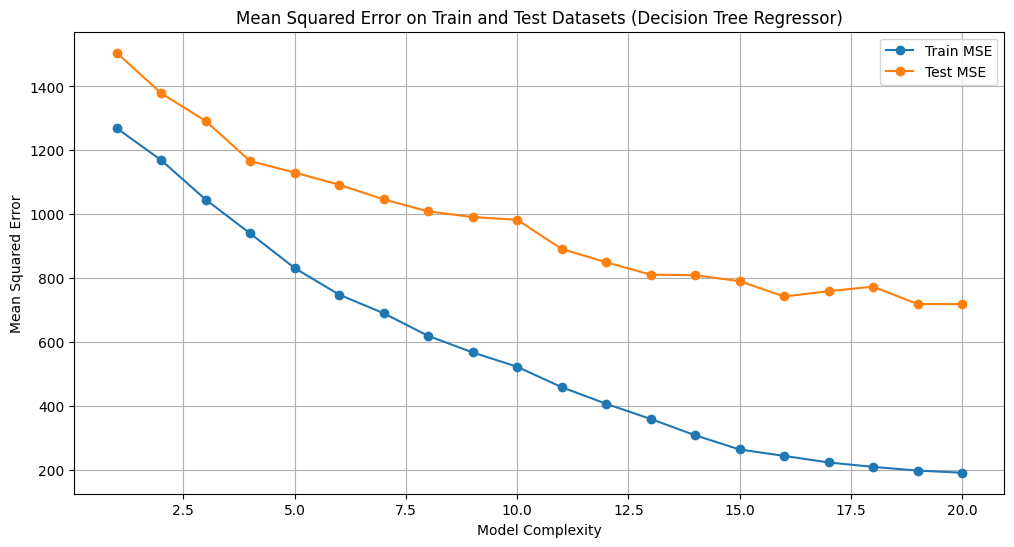

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(values, train_errors, marker='o', label='Train MSE')
plt.plot(values, test_errors, marker='o', label='Test MSE')
plt.xlabel('Model Complexity')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error on Train and Test Datasets (Decision Tree Regressor)')
plt.legend()
plt.grid(True)
plt.show()